In [1]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import cv2

[+] MESSAGE RECEIVED FROM BATTALION 7.


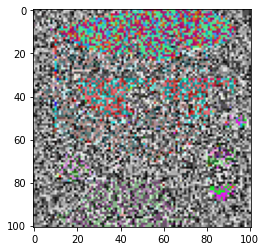

In [2]:
im = Image.open("crenc.png", 'r')
imshow(np.asarray(im))
print("[+] MESSAGE RECEIVED FROM BATTALION 7.")

In [3]:
def getImageMatrix(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
        color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0],color

In [4]:
def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + int(bit)
    return decimal

In [5]:
def genMap(dimension, key):
    x = key[0]
    y = key[1]
    sequenceSize = dimension * dimension * 8 #Total Number of bitSequence produced
    bitSequence = []    #Each bitSequence contains 8 bits
    byteArray = []      #Each byteArray contains m( i.e 512 in this case) bitSequence
    TImageMatrix = []   #Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)
    for i in range(sequenceSize):
        xN = y + 1 - 1.4 * x**2
        yN = 0.3 * x
        x = xN
        y = yN
        if xN <= 0.4:
            bit = 0
        else:
            bit = 1
        try:
            bitSequence.append(bit)
        except:
            bitSequence = [bit]
        if i % 8 == 7:
            decimal = dec(bitSequence)
            try:
                byteArray.append(decimal)
            except:
                byteArray = [decimal]
            bitSequence = []
        byteArraySize = dimension*8
        if i % byteArraySize == byteArraySize-1:
            try:
                TImageMatrix.append(byteArray)
            except:
                TImageMatrix = [byteArray]
            byteArray = []
    return TImageMatrix

In [6]:
def Decryption(imageNameEnc, key):
    imageMatrix, dimension, color = getImageMatrix(imageNameEnc)
    transformationMatrix = genMap(dimension, key)
    pil_im = Image.open(imageNameEnc, 'r')
    imshow(np.asarray(pil_im))
    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            henonDecryptedImage.append(row)
        except:
            henonDecryptedImage = [row]
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else: 
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save("drenc.png", "PNG")

In [7]:
def to_bin(data):#Convert `data` to binary format as string
    if isinstance(data, str):
        return ''.join([ format(ord(i), "08b") for i in data ])
    elif isinstance(data, bytes) or isinstance(data, np.ndarray):
        return [ format(i, "08b") for i in data ]
    elif isinstance(data, int) or isinstance(data, np.uint8):
        return format(data, "08b")
    else:
        raise TypeError("Type not supported.")

[+] TIER-1 DECRYPTED


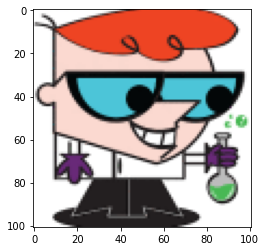

In [8]:
key = (0.1,0.1)
Decryption("crenc.png", key)
im = Image.open("drenc.png", 'r')
imshow(np.asarray(im))
print("[+] TIER-1 DECRYPTED")

In [9]:
def decode(image_name):
    print("[+] Decoding...")
    # read the image
    image = cv2.imread("drenc.png")
    binary_data = ""
    for row in image:
        for pixel in row:
            r, g, b = to_bin(pixel)
            binary_data += r[-1]
            binary_data += g[-1]
            binary_data += b[-1]
    # split by 8-bits
    all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
    # convert from bits to characters
    decoded_data = ""
    for byte in all_bytes:
        decoded_data += chr(int(byte, 2))
        if decoded_data[-5:] == "=====":
            break
    return decoded_data[:-5]

In [10]:
decoded_data = decode("drenc.png")
print("[+] Decoded data:", decoded_data)
print("[+]TIER-2 DECRYPTED\nMESSAGE RECEIVED.")


[+] Decoding...
[+] Decoded data: ENEMY MOVING WEST. ATTACK.
[+]TIER-2 DECRYPTED
MESSAGE RECEIVED.
